# Análise a respeito do número de funcionários

Importando bibliotecas necessárias:

In [8]:
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
import numpy as np
import sqlite3

Base de dados:

In [9]:
conn = sqlite3.connect('../db.sqlite3')
cur = conn.cursor()

query = '''
SELECT * 
FROM delphone_empresa
'''

empresa = pd.read_sql(query, con = conn)

empresa = empresa.drop(columns = 'id') 

empresa.head()

,nome,email,celular,endereco,estado,cidade,setor,n_funcionario,n_filiais,data_criacao,faturamento_anual,horario_abertura,horario_fechamento
0,Vega-Davis,moniquepatterson@example.net,619-235-8267x594,"39072 Dominguez Brooks\nNew Sean, AL 24938",RS,Vila Maria,Papelaria,945.0,57.0,1983-08-15,261.0,14:22:00,07:55:39
1,"Molina, Turner and Evans",rcarpenter@example.net,793-057-3456x927,"386 James Neck\nJasminefort, WV 94271",BA,Riachão Das Neves,Esportes,380.0,86.0,2021-02-01,535.0,04:08:05,07:35:00
2,Cameron-Mcdonald,charlesanderson@example.com,001-182-115-3409,"8674 Jose Lock Apt. 550\nLake Malikview, LA 39125",MG,Itanhomi,Vestuário,540.0,34.0,2005-07-11,573.0,10:35:44,19:29:34
3,Mcdonald-Hudson,msanders@example.com,+1-924-043-5432x16295,"385 Brett Valleys\nNorth Mary, NE 72357",CE,Ipueiras,Cozinha,283.0,26.0,1997-08-31,955.0,09:02:09,01:30:08
4,Myers-Diaz,carrolldeborah@example.com,(779)083-8986,"65693 Lee Court Apt. 876\nNew Victorialand, KY...",PB,Santa Cecília,Esportes,322.0,3.0,1978-05-19,459.0,04:40:42,15:31:53


Quais setores têm a maior e a menor média de funcionários por empresa?

Como observado na tabela e no gráfico abaixo, o setor Cozinha tem a maior média de funcionários por empresa e o setor Papelaria tem a menor média de funcionários por empresa.

,n_funcionario,n_filiais,faturamento_anual
setor,,,
Papelaria,479.042105,52.515789,474.000000
Farmácia,484.222222,48.731481,485.194444
Alimentação,484.920455,49.852273,502.636364
Esportes,489.159292,45.309735,431.663717
Vestuário,489.692308,44.567308,554.394231
Material de construção,513.663043,50.586957,515.989130
Eletrodomésticos,518.474227,49.938144,519.948454
Música,525.857143,52.744898,496.908163
Mobília,528.704762,45.923810,480.828571


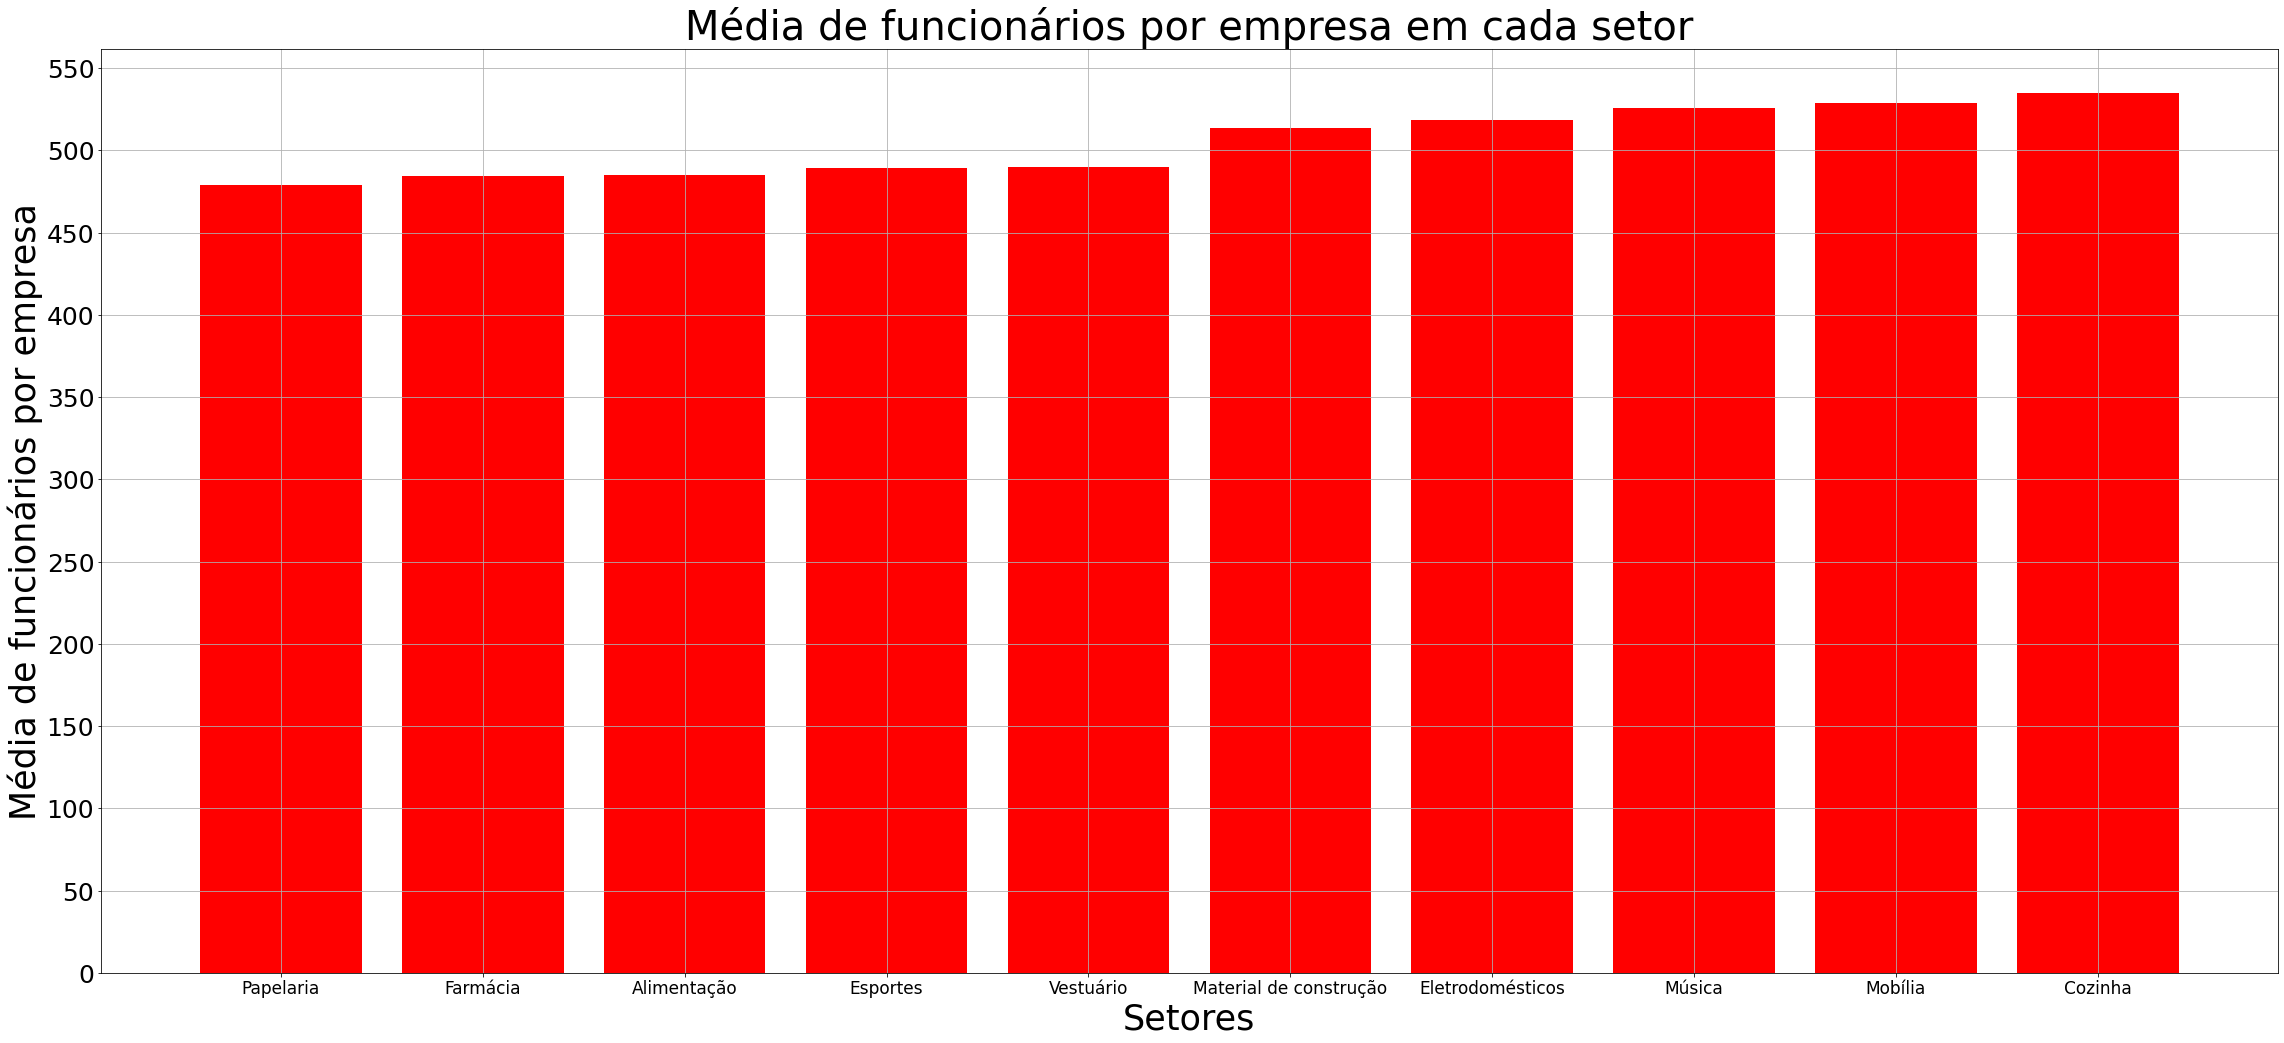

In [10]:
setor_media = empresa.groupby(['setor']).mean().sort_values(by='n_funcionario')
Setores = ["Papelaria","Farmácia","Alimentação","Esportes","Vestuário","Material de construção","Eletrodomésticos","Música","Mobília","Cozinha"]
Média = [479.042,484.222,484.920,489.159,489.692,513.663,518.474,525.857,528.704,535.080]

plt.figure(figsize=(39, 17))
plt.bar(Setores,Média,color='red')
plt.ylabel("Média de funcionários por empresa",fontsize=35)
plt.xlabel("Setores",fontsize=35)
plt.title("Média de funcionários por empresa em cada setor",fontsize=40)
plt.yticks([0,50,100,150,200,250,300,350,400,450,500,550])
plt.grid(b=None)
plt.xticks(fontsize=17)
plt.yticks(fontsize=25)

setor_media

Quais estados têm a maior e a menor média de funcionários por empresa?

Como observado na tabela e no gráfico abaixo, Espírito Santo tem a maior média de funcionários por empresa e Amapá tem a menor média de funcionários por empresa.

,n_funcionario,n_filiais,faturamento_anual
estado,,,
AP,122.000000,14.000000,256.000000
DF,271.000000,96.000000,367.000000
AC,303.800000,55.200000,426.200000
PE,451.870968,44.870968,416.612903
GO,457.783784,46.189189,471.756757
SE,459.583333,52.000000,564.416667
AM,463.928571,53.357143,314.000000
PR,472.441558,43.727273,495.870130
PB,476.153846,44.410256,487.384615


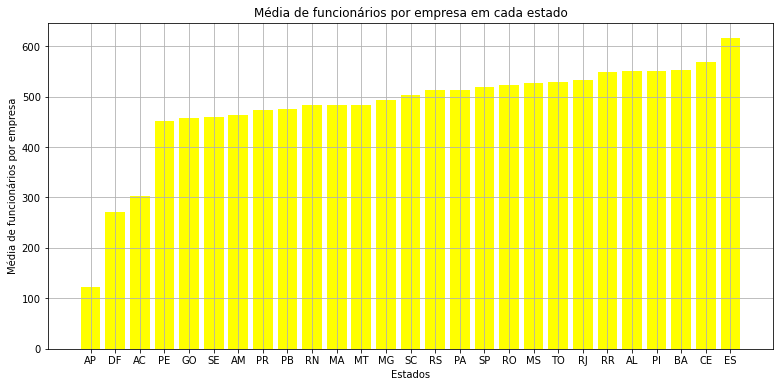

In [11]:
estado_media = empresa.groupby(['estado']).mean().sort_values(by='n_funcionario')

Siglas = ["AP","DF","AC","PE","GO","SE","AM","PR","PB","RN","MA","MT","MG","SC","RS","PA","SP","RO","MS","TO","RJ","RR","AL","PI","BA","CE","ES"]
Média = [122.000,271.000,303.800,451.870,457.783,459.583,463.928,472.441,476.153,483.121,483.457,483.540,493.783,503.949,512.355,513.714,518.653,523.600,527.692,529.066,532.705,548.800,550.222,551.411,551.851,568.387,615.750]

plt.figure(figsize=(13, 6))
plt.bar(Siglas,Média,color='yellow')
plt.ylabel("Média de funcionários por empresa")
plt.xlabel("Estados")
plt.title("Média de funcionários por empresa em cada estado")
plt.grid(b=None)

estado_media

Quais setores têm a maior e a menor quantidade de funcionários?

Como observado na tabela e no gráfico abaixo, o setor Mobília tem a maior quantidade de funcionários e o setor Alimentação tem a menor quantidade de funcionários.

,n_funcionario,n_filiais,faturamento_anual
setor,,,
Alimentação,42673.0,4387.0,44232.0
Papelaria,45509.0,4989.0,45030.0
Material de construção,47257.0,4654.0,47471.0
Eletrodomésticos,50292.0,4844.0,50435.0
Vestuário,50928.0,4635.0,57657.0
Música,51534.0,5169.0,48697.0
Farmácia,52296.0,5263.0,52401.0
Cozinha,53508.0,4893.0,52363.0
Esportes,55275.0,5120.0,48778.0


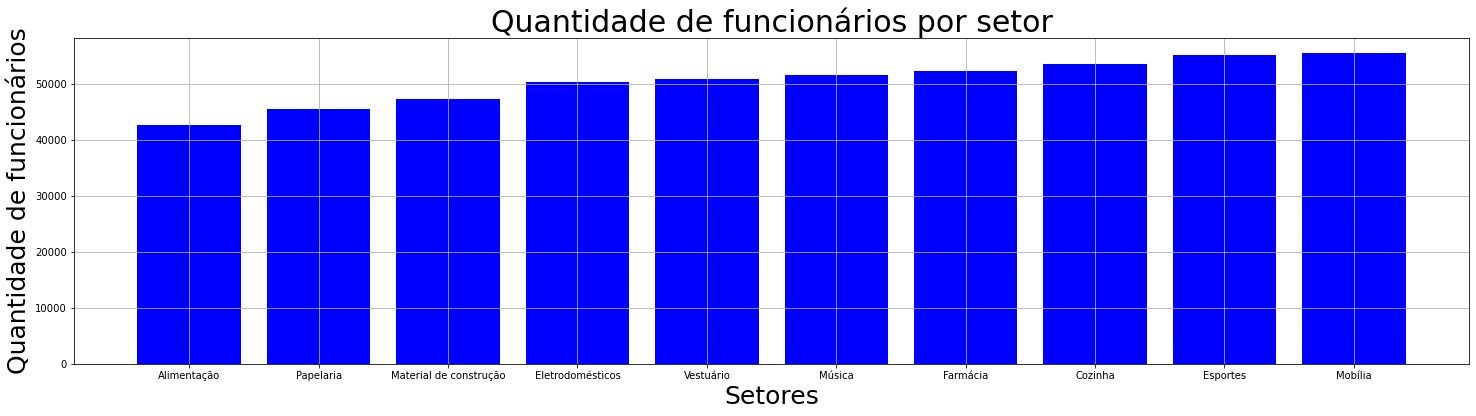

In [12]:
setor_soma = empresa.groupby(by='setor').sum().sort_values(by='n_funcionario')

Setores = ["Alimentação","Papelaria","Material de construção","Eletrodomésticos","Vestuário","Música","Farmácia","Cozinha","Esportes","Mobília"]
Funcionários = [42673.0,45509.0,47257.0,50292.0,50928.0,51534.0,52296.0,53508.0,55275.0,55514.0]

plt.figure(figsize=(25, 6))
plt.bar(Setores,Funcionários,color='blue')
plt.ylabel("Quantidade de funcionários",fontsize=25)
plt.xlabel("Setores",fontsize=25)
plt.title("Quantidade de funcionários por setor",fontsize=30)
plt.grid(b=None)

setor_soma

Quais estados têm a maior e a menor quantidade de funcionários?

Como observado na tabela e no gráfico abaixo, Minas Gerais tem a maior quantidade de funcionários e Amapá tem a menor quantidade de funcionários.

,n_funcionario,n_filiais,faturamento_anual
estado,,,
AP,122.0,14.0,256.0
DF,271.0,96.0,367.0
AC,1519.0,276.0,2131.0
RR,2744.0,275.0,2177.0
RO,5236.0,583.0,5021.0
SE,5515.0,624.0,6773.0
AM,6495.0,747.0,4396.0
MS,6860.0,527.0,5551.0
TO,7936.0,668.0,6717.0


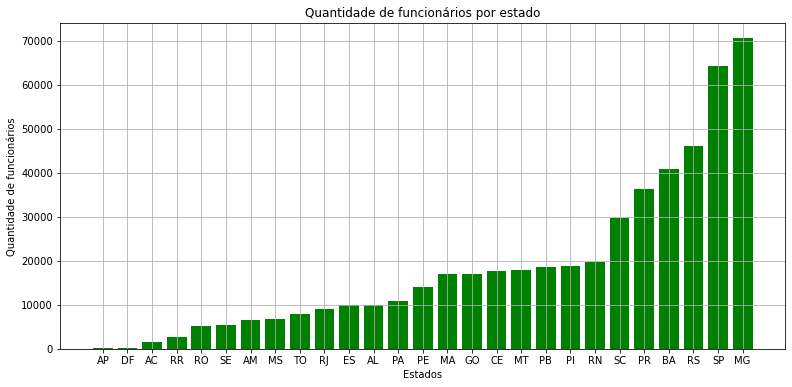

In [13]:
estado_soma = empresa.groupby(by='estado').sum().sort_values(by='n_funcionario')

Estados = ["AP","DF","AC","RR","RO","SE","AM","MS","TO","RJ","ES","AL","PA","PE","MA","GO","CE","MT","PB","PI","RN","SC","PR","BA","RS","SP","MG"]
Funcionários = [122.0,271.0,1519.0,2744.0,5236.0,5515.0,6495.0,6860.0,7936.0,9056.0,9852.0,9904.0,10788.0,14008.0,16921.0,16938.0,17620.0,17891.0,18570.0,18748.0,19808.0,29733.0,36378.0,40837.0,46112.0,64313.0,70611.0]

plt.figure(figsize=(13, 6))
plt.bar(Estados,Funcionários,color='green')
plt.ylabel("Quantidade de funcionários")
plt.xlabel("Estados")
plt.title("Quantidade de funcionários por estado")
plt.grid(b=None)

estado_soma